6. En PYTHON grafique el arbol de decisión (puede no ser aplicable, pero obtenga una representación cercana).

In [28]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/MyDrive/INF-354")
import pandas as pd
import numpy as np
datos = pd.read_csv("vinosDatasetArbol.csv")
print(datos)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [4]:
# Leer el conjunto de datos
datos = pd.read_csv("vinosDatasetArbol.csv")

# Iterar sobre las filas y buscar valores no numéricos en la columna "calidad"
for index, row in datos.iterrows():
    calidad = row['calidad']
    try:
        # Intentar convertir el valor a un número flotante
        float(calidad)
    except ValueError:
        # Si no se puede convertir a un número, imprimir la fila
        print("Fila con valor no numérico en la columna 'calidad':")
        print(row)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
sulphates                   0.6
alcohol                    10.3
quality                       6
calidad                   MEDIA
Name: 1265, dtype: object
Fila con valor no numérico en la columna 'calidad':
fixed acidity               7.2
volatile acidity           0.57
citric acid                0.05
residual sugar              2.3
chlorides                 0.081
free sulfur dioxide        16.0
total sulfur dioxide       36.0
density                 0.99564
pH                         3.38
sulphates                   0.6
alcohol                    10.3
quality                       6
calidad                   MEDIA
Name: 1266, dtype: object
Fila con valor no numérico en la columna 'calidad':
fixed acidity            10.4
volatile acidity         0.43
citric acid               0.5
residual sugar            2.3
chlorides               0.068
free sulfur dioxide      13.0
total sulfur dioxide     19.0
density                

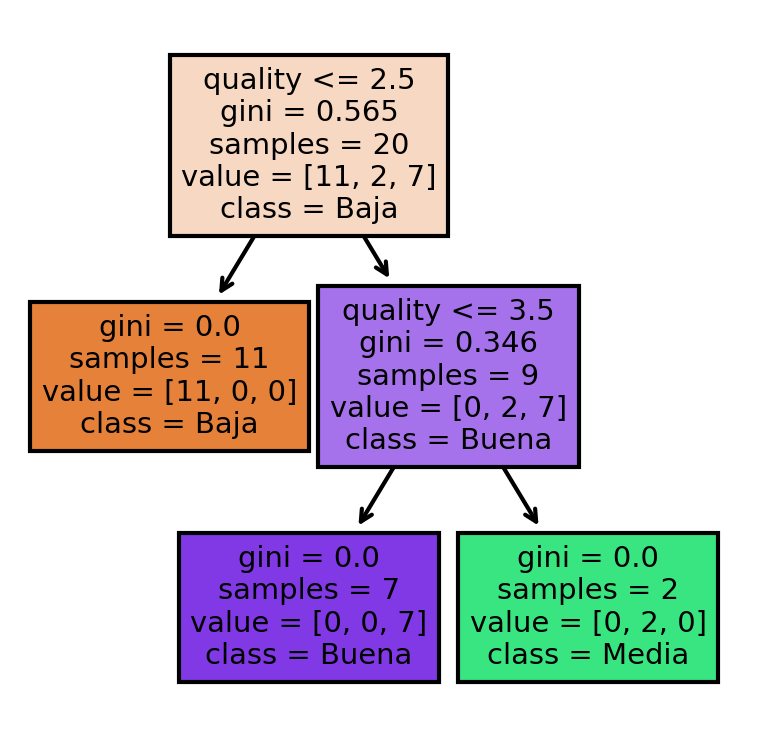

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Leer el archivo CSV
df = pd.read_csv('vinosDatasetArbol.csv')

# Eliminar la primera fila (nombres de los campos)
df = df.drop(0)

# Seleccionar las columnas de interés
df = df[['residual sugar', 'chlorides', 'quality', 'calidad']]

# Convertir las variables categóricas a valores numéricos
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])
df['calidad'] = le.fit_transform(df['calidad'])

# Seleccionar 20 filas al azar para generar el árbol de decisión
df = df.sample(n=20, random_state=42)

# Separar las características y la variable objetivo
X = df[['residual sugar', 'chlorides', 'quality']]
y = df['calidad']

# Entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Graficar el árbol de decisión
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,3), dpi=300)
plot_tree(clf, feature_names=X.columns, class_names=['Baja', 'Media', 'Buena', 'Muy Buena'], filled=True)
plt.show()

